In [1]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import numpy as np
from matplotlib import pyplot as plt
import a301.radiation as rad

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span></li></ul></div>

# Problem 1

In the cell below, write a script that:

1. Reads Modis channel 30 (ozone absorbing channel) and Modis Channel 31 (one of the "window" channels) into two numpy arrays (see [Modis channel listing](https://modis.gsfc.nasa.gov/about/specifications.php))

1. Converts them to calibrated radiances using the mid-range wavelength for each channel

1. Calculates the brightness temperature for each channel using the code in the a301.radiation module

1. plots the brightness temperature difference Tbright31 - Tbright30 for your scene

### Create 2 Arrays for channel 30 and 31

In [2]:
this_dir = Path.cwd()
data_dir = this_dir.parent/Path('data')
hdf_files=list(data_dir.glob("MYD021KM*1150*.hdf"))
file_name = str(data_dir / Path(hdf_files[0]))
the_file = SD(file_name, SDC.READ)
datasets_dict = the_file.datasets()

# for idx,sds in enumerate(datasets_dict.keys()):
#     print(idx,sds)


longwave_data = the_file.select('EV_1KM_Emissive')    
longwave_bands = the_file.select('Band_1KM_Emissive')
band_nums=longwave_bands.get()

ch30_index=np.searchsorted(band_nums,30.)
ch30_data = longwave_data[int(ch30_index),:,:]

ch31_index=np.searchsorted(band_nums,31.)
ch31_data = longwave_data[int(ch31_index),:,:]



### Convert to calibrated radiances and write out
$Radiances = (RawData - offset) \times scale$

In [3]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale

# # Write out the HDF file
# outname30="ch30_out_pa.hdf"
# sd30 = SD(outname30, SDC.WRITE | SDC.CREATE)
# sds30 = sd30.create("ch30", SDC.FLOAT64, ch30_calibrated.shape)
# sds30.setfillvalue(0)

# dim1_30 = sds30.dim(0)
# dim1_30.setname("row")
# dim2_30 = sds30.dim(1)
# dim2_30.setname("col")

# sds30.units = "W/m^2/micron/sr"
# sds30[:,:] = ch30_calibrated
# sds30.endaccess()
# sd30.end()



# scales=longwave_data.attributes()['radiance_scales']
# offsets=longwave_data.attributes()['radiance_offsets']
# ch31_scale=scales[ch31_index]
# ch31_offset=offsets[ch31_index]
# ch31_calibrated =(ch31_data - ch31_offset)*ch31_scale

# # Write out the HDF file
# outname31="ch31_out_pa.hdf"
# sd31 = SD(outname31, SDC.WRITE | SDC.CREATE)
# sds31 = sd31.create("ch31", SDC.FLOAT64, ch31_calibrated.shape)
# sds31.setfillvalue(0)

# dim1_31 = sds31.dim(0)
# dim1_31.setname("row")
# dim2_31 = sds31.dim(1)
# dim2_31.setname("col")

# sds31.units = "W/m^2/micron/sr"
# sds31[:,:] = ch31_calibrated
# sds31.endaccess()
# sd31.end()


# local_file30 = Path.cwd() / Path(outname30)
# to_file30 = data_dir / Path(outname30)
# local_file30.rename(to_file30)

# local_file31 = Path.cwd() / Path(outname31)
# to_file31 = data_dir / Path(outname31)
# local_file31.rename(to_file31)

### Calculate brightness temp for each channel and find difference

In [4]:
wave30= 9.73e-6
wave31= 11.03e-6 
ch30_radiances=ch30_data*1.e6;  #convert radiance to MKS
ch31_radiances=ch31_data*1.e6;
ch30_Tbright = rad.planck_invert(wave30,ch30_radiances)
ch31_Tbright = rad.planck_invert(wave31,ch31_radiances)

difference = ch31_Tbright - ch30_Tbright

### Plot

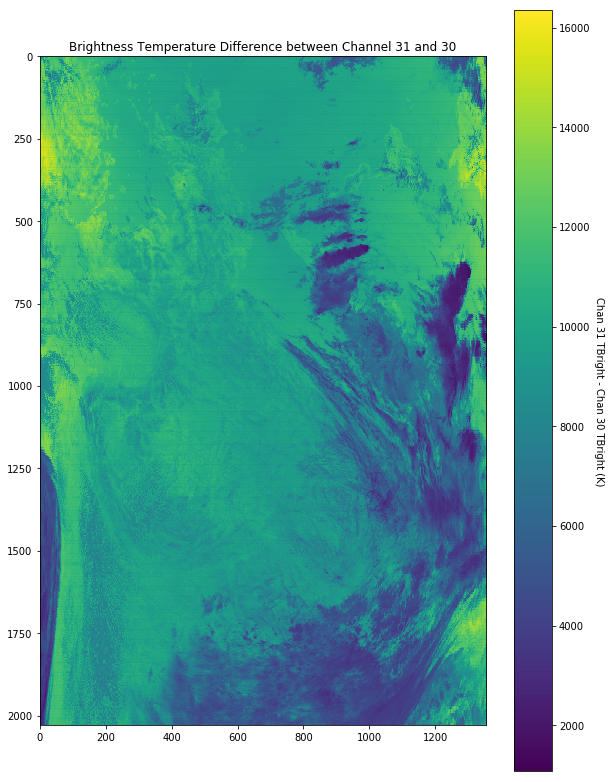

In [5]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(difference)
cax=fig.colorbar(CS)
ax.set_title('Brightness Temperature Difference between Channel 31 and 30')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 31 TBright - Chan 30 TBright (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)